# kNN Classification
### 2024-05-01
### 202104591 김하준

## 1. Import & 2. Parsing data

In [6]:
# Import
import pandas as pd

targetUrl = "https://raw.githubusercontent.com/oprostep/2024-Spring-ML/main/fake_bills.csv"

# Parsing
df = pd.read_csv(targetUrl, sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## 3. One-hot encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding
ohe = OneHotEncoder(sparse=False)
ohe.fit(df[['is_genuine']])
df_encoded = ohe.transform(df[['is_genuine']])
df_encoded=pd.DataFrame(df_encoded)

df_drop = df.drop(['is_genuine'], axis=1)
df_drop.insert(0,'is_genuine',df_encoded[1])

df_drop.head()
df_drop.tail()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25
1499,0.0,171.47,104.15,103.82,4.63,3.37,112.07


## 4. Missing value

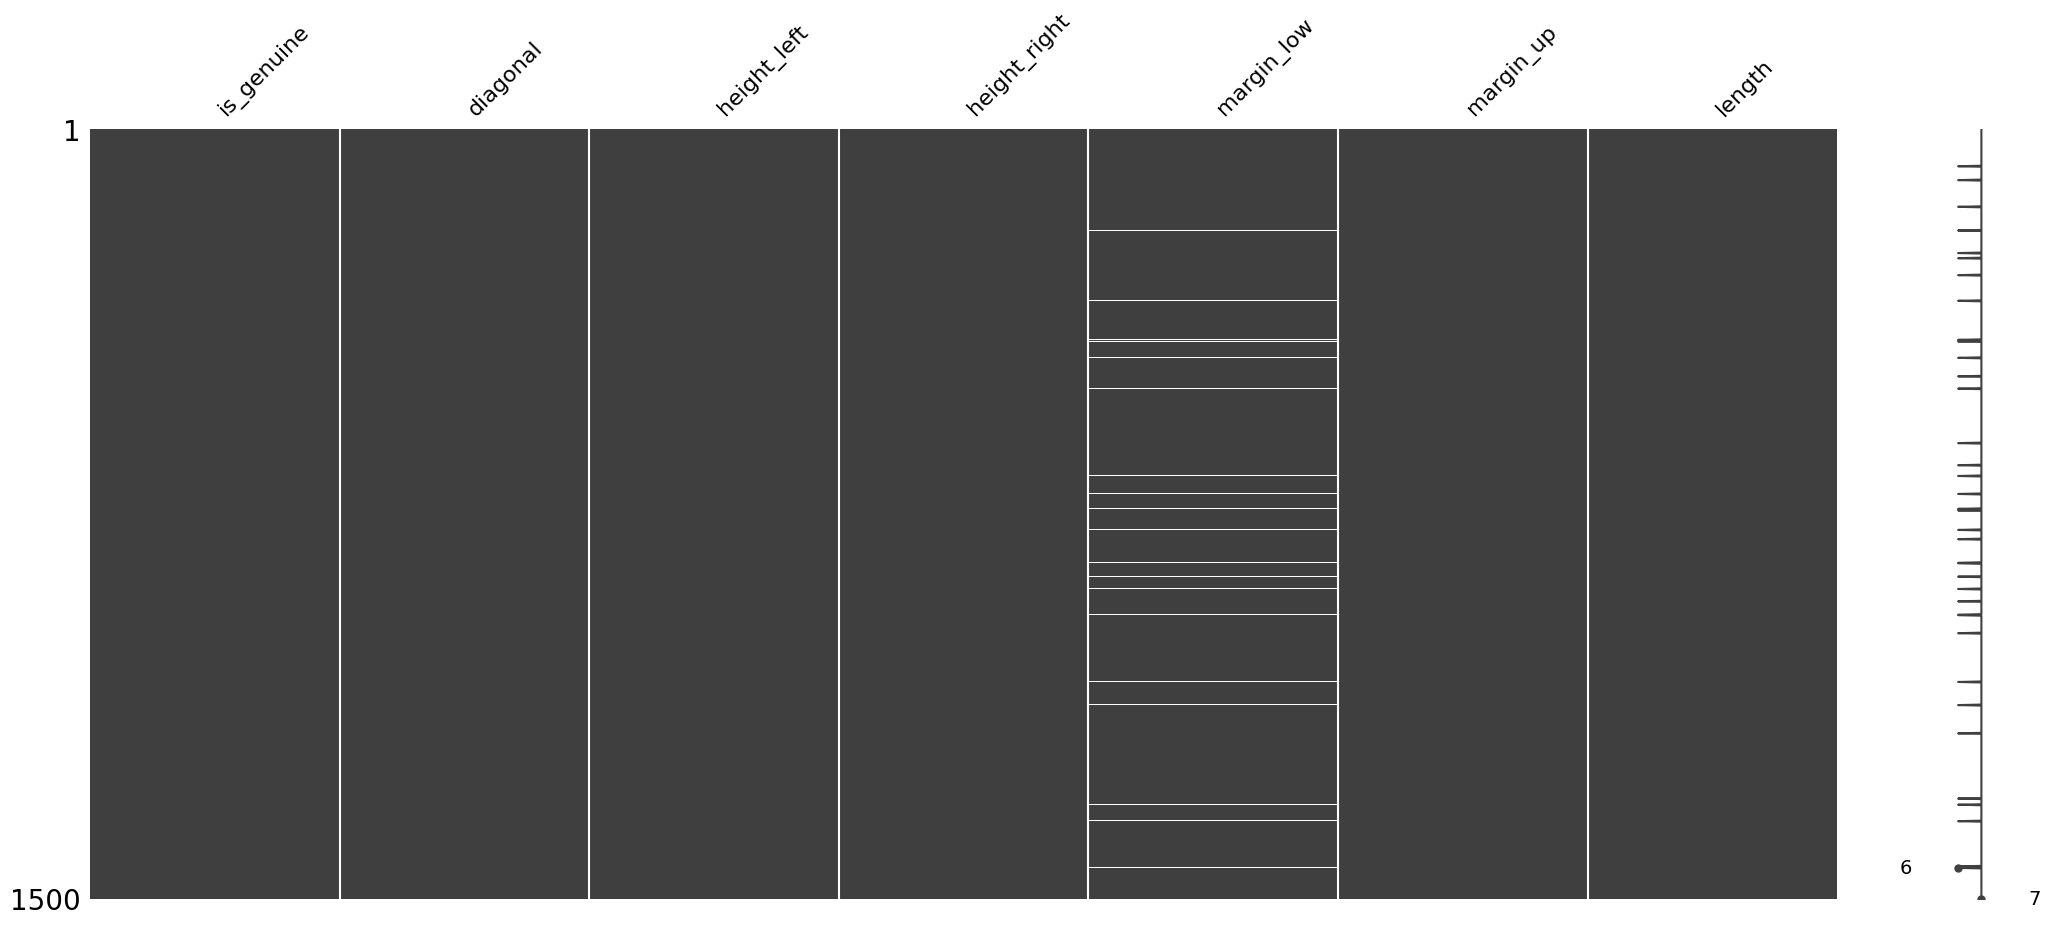

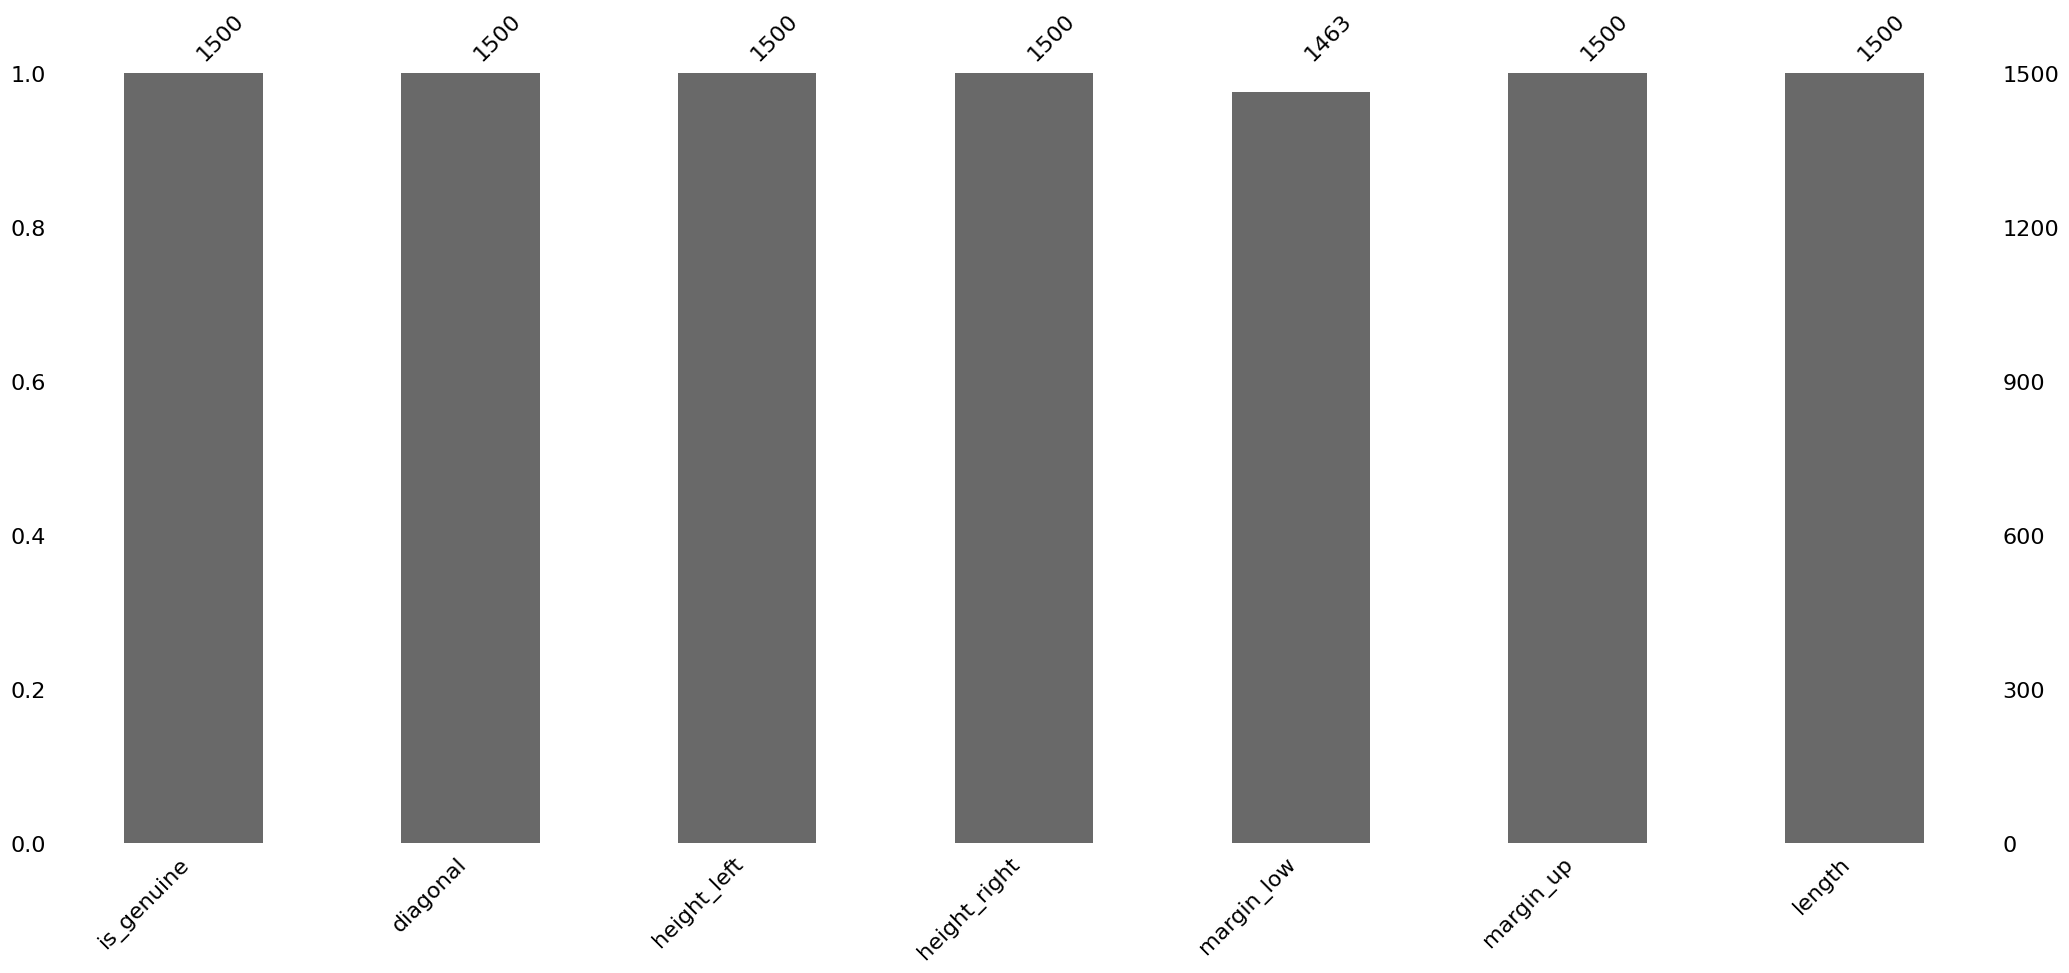

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [8]:
import missingno as msno
import matplotlib.pyplot as plt

# missingno
msno.matrix(df_drop)
plt.show()
msno.bar(df_drop)
plt.show()

from sklearn.impute import KNNImputer

# Knn
imputer = KNNImputer(n_neighbors=2)

df_imputed=imputer.fit_transform(df_drop)

df_imputed=pd.DataFrame(df_imputed)
df_imputed.info()

## 5. EDA (pairplot, np.corrcoef)

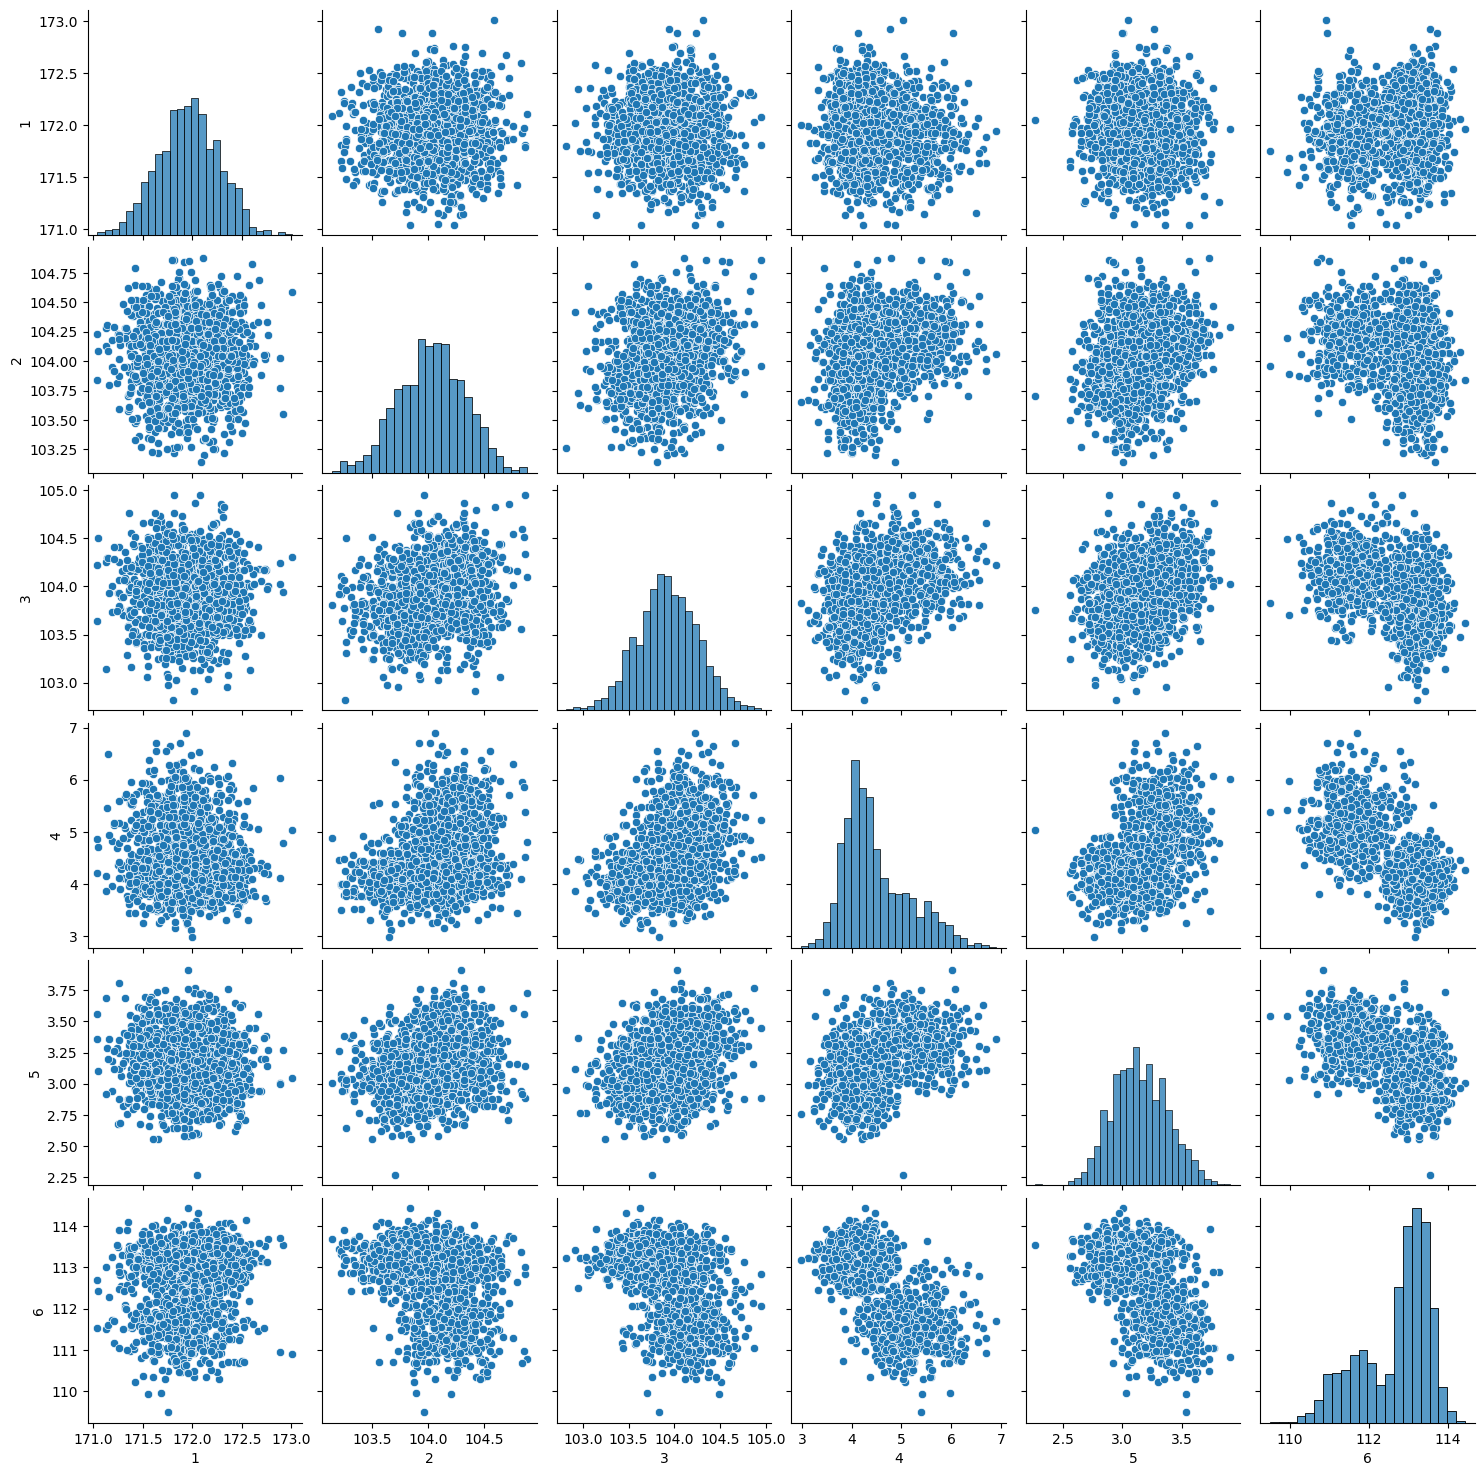

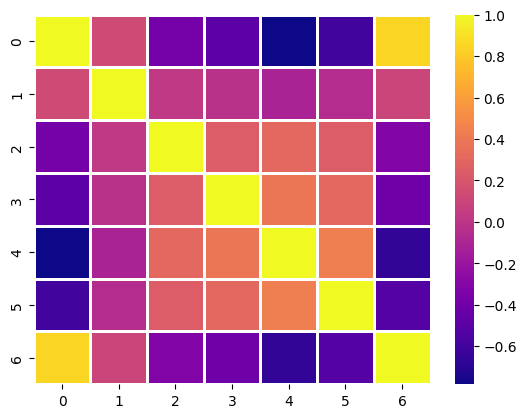

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# pairplot
sns.pairplot(df_imputed.iloc[:,1:7]);
plt.show()

import numpy as np

# correlation
corr_mat=np.corrcoef(df_imputed,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='plasma')
plt.show()

## 6~9
### 6. normalizing (standarization)
### 7. Train - Test split (stratify)
### 8. Grid Search (10 fold cross validation)
### 9. Score (hyper-parameter)

In [10]:
from sklearn.model_selection import train_test_split

# Split & Stratify
X_train, X_test, y_train, y_test = train_test_split(df_imputed.iloc[:,1:7], df_imputed.iloc[:,0], test_size=0.2, stratify=df_imputed[0], random_state=500)

# Standarization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Grid search & Score
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(knn, grid_params)
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

# Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best Score :  0.9925
Best Test Score :  0.99
Accuracy: 99.00 %
Standard Deviation: 0.97 %
